In [1]:
import os
os.environ['OPENAI_API_KEY'] = "EXAMPLE"

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/langchainsawman/week4

/content/drive/MyDrive/Colab Notebooks/langchainsawman/week4


# 벡터 스토어
##### 구조화되지 않은 데이터를 저장하고 검색하는 가장 일반적인 방법 중 하나는 이를 포함하고 결과 임베딩 벡터를 저장한 다음 쿼리 시 가장 유사한 임베딩 벡터를 검색하는 것이다.
##### 벡터 스토어는 삽입된 데이터를 저장하고 벡터 검색을 수행하는 일을 담당한다.

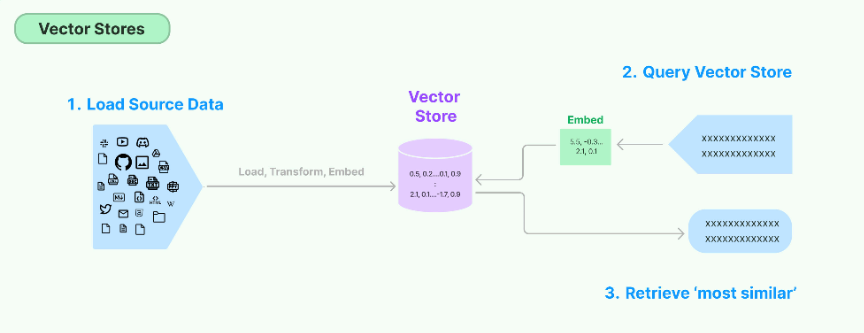

In [ ]:
!pip install -qU faiss-cpu
!pip install -qU langchain

In [ ]:
!pip install -qU langchain_openai

In [7]:
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
raw_documents = TextLoader('whatsapp_chat.txt').load()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)
db = FAISS.from_documents(documents, OpenAIEmbeddings())

### 유사성 검색

In [ ]:
query = "how much bag price"
docs = db.similarity_search(query)
print(docs[0].page_content)

### 벡터별 유사성 검색
##### 문자열 대신 임베딩 벡터를 매개변수로 허용하여 특정 임베딩 벡터와 유사한 문서를 검색한다.

In [ ]:
embedding_vector = OpenAIEmbeddings().embed_query(query)
docs = db.similarity_search_by_vector(embedding_vector)
print(docs[0].page_content)

### 비동기 작업(Qdrant - 비동기 지원 가능한 벡터 스토어)

In [ ]:
from langchain_community.vectorstores import Qdrant

db = await Qdrant.afrom_documents(documents, embeddings, "http://localhost:6333")

query = "What did the president say about Ketanji Brown Jackson"
docs = await db.asimilarity_search(query)
print(docs[0].page_content)

embedding_vector = embeddings.embed_query(query)
docs = await db.asimilarity_search_by_vector(embedding_vector)

### 최대 한계 관련성 검색(MMR)
##### MMR은 선택한 문서 간의 쿼리 유사성과 다양성을 최적화한다. (비동기 API도 지원)

In [ ]:
query = "What did the president say about Ketanji Brown Jackson"
found_docs = await qdrant.amax_marginal_relevance_search(query, k=2, fetch_k=10)
for i, doc in enumerate(found_docs):
    print(f"{i + 1}.", doc.page_content, "\n")